#Decision tree classifier

The Decision Tree Classifier is quite simple in its implementation, think of it as a bunch of if statements of which splits up data into separate catagories

Decision trees are a popular and intuitive tool used in machine learning and decision analysis to make predictions or decisions based on data. Here’s a detailed description of their components and how they work:

- Root Node: This is the starting point of the tree. It represents the initial decision or question to be made.


- Decision Nodes: These nodes, typically represented as squares, show where decisions are made. Each decision node branches out into different possible actions or choices.


- Chance Nodes: Represented as circles, these nodes illustrate the outcomes of random events or probabilities that follow from a decision node. Each branch from a chance node represents a possible outcome with its associated probability.


- Branches: The lines connecting nodes represent the flow of decisions and outcomes. Each branch signifies a possible action or outcome resulting from a decision or chance event.


- Leaf Nodes: These are the terminal nodes at the end of the branches. They represent the final outcomes or consequences of the decisions made along the path. Leaf nodes usually include the expected utility or value of the outcome.


- Paths: The paths from the root to the leaf nodes represent different possible sequences of decisions and outcomes.


- Probability Weights: For chance nodes, these weights are the probabilities assigned to each possible outcome. They help in calculating the expected value of different choices.


- Payoffs or Utilities: The values or utilities associated with the final
outcomes, often found at the leaf nodes. These values help in evaluating and comparing different decision paths.



A good way to understand the Decision tree classifier is the graphical representation.
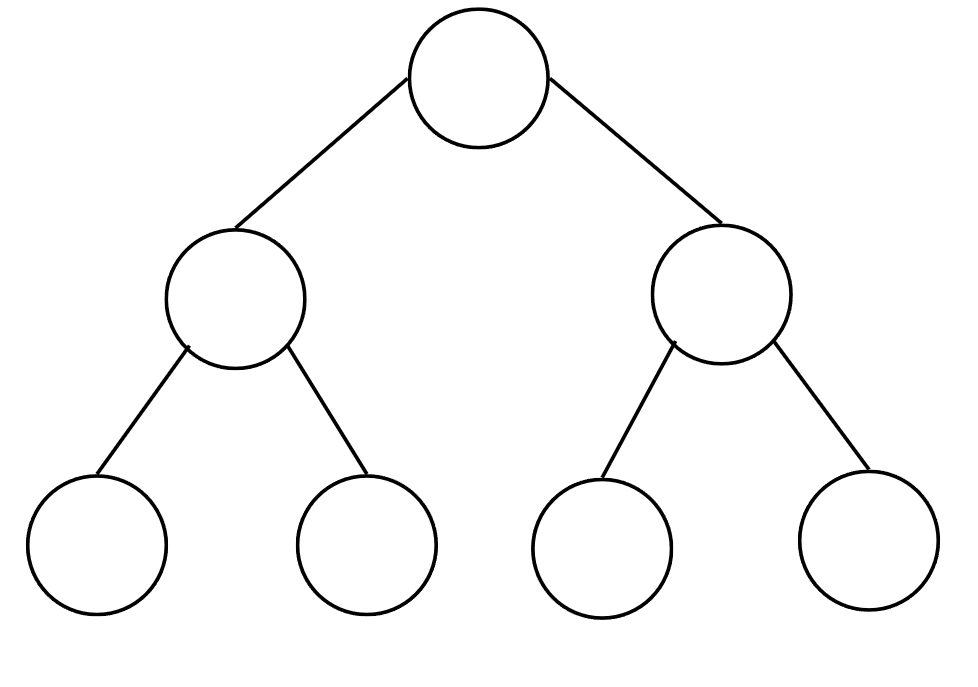

##Without Library

### Problem statement



You are an ecologist who is developing a national classification model. Specifically, you are making an easy way for your students to classify animals and learn classification techniques. With this dataset, create a decision tree model to classify and sort every animal.

The data is presented below:


###*Data*

In [ ]:

Data = [
    {
        "name": "Green Gecko",
        "legs": "four legs",
        "type": "lizard",
        "color": "green",
        "teeth_shape": "sharp"
    },
    {
        "name": "Apple",
        "legs": "no legs",
        "type": "fruit",
        "color": "red",
        "teeth_shape": "none"
    },
    {
        "name": "Chicken",
        "legs": "two legs",
        "type": "bird",
        "color": "white",
        "teeth_shape": "none"
    },
    {
        "name": "Apple",
        "legs": "no legs",
        "type": "fruit",
        "color": "green",
        "teeth_shape": "none"
    },
    {
        "name": "Apple",
        "legs": "no legs",
        "type": "fruit",
        "color": "yellow",
        "teeth_shape": "none"
    },
    {
        "name": "Chicken",
        "legs": "two legs",
        "type": "bird",
        "color": "brown",
        "teeth_shape": "none"
    },
    {
        "name": "Rainbow Parakeet",
        "legs": "two legs",
        "type": "bird",
        "color": "multicolored",
        "teeth_shape": "none"
    },
    {
        "name": "Elephant",
        "legs": "four legs",
        "type": "mammal",
        "color": "gray",
        "teeth_shape": "flat"
    },
    {
        "name": "Spider",
        "legs": "eight legs",
        "type": "arachnid",
        "color": "black",
        "teeth_shape": "sharp"
    },
    {
        "name": "Penguin",
        "legs": "two legs",
        "type": "bird",
        "color": "black and white",
        "teeth_shape": "none"
    },
    {
        "name": "Carrot",
        "legs": "no legs",
        "type": "vegetable",
        "color": "orange",
        "teeth_shape": "none"
    },
    {
        "name": "Giraffe",
        "legs": "four legs",
        "type": "mammal",
        "color": "yellow with brown spots",
        "teeth_shape": "flat"
    },
    {
        "name": "Goldfish",
        "legs": "no legs",
        "type": "fish",
        "color": "gold",
        "teeth_shape": "none"
    },
    {
        "name": "Squirrel",
        "legs": "four legs",
        "type": "mammal",
        "color": "brown",
        "teeth_shape": "sharp"
    },
    {
        "name": "Shark",
        "legs": "no legs",
        "type": "fish",
        "color": "gray",
        "teeth_shape": "sharp"
    },
    {
        "name": "Dog",
        "legs": "four legs",
        "type": "mammal",
        "color": "various",
        "teeth_shape": "sharp"
    },
    {
        "name": "Parrot",
        "legs": "two legs",
        "type": "bird",
        "color": "green",
        "teeth_shape": "none"
    },
    {
        "name": "Bat",
        "legs": "two legs, two wings",
        "type": "mammal",
        "color": "black",
        "teeth_shape": "sharp"
    },
    {
        "name": "Beetle",
        "legs": "six legs",
        "type": "insect",
        "color": "various",
        "teeth_shape": "sharp"
    },
    {
        "name": "Turtle",
        "legs": "four legs",
        "type": "reptile",
        "color": "green",
        "teeth_shape": "none"
    },
    {
        "name": "Lemon",
        "legs": "no legs",
        "type": "fruit",
        "color": "yellow",
        "teeth_shape": "none"
    },
    {
        "name": "Apple",
        "legs": "no legs",
        "type": "fruit",
        "color": "red",
        "teeth_shape": "none"  # Duplicate entry
    },
    {
        "name": "Penguin",
        "legs": "two legs",
        "type": "bird",
        "color": "black and white",
        "teeth_shape": "none"  # Duplicate entry
    },
    {
        "name": "Elephant",
        "legs": "four legs",
        "type": "mammal",
        "color": "gray",
        "teeth_shape": "flat"  # Duplicate entry
    },
    {
        "name": "Spider",
        "legs": "eight legs",
        "type": "arachnid",
        "color": "black",
        "teeth_shape": "sharp"  # Duplicate entry
    },
    {
        "name": "Bat",
        "legs": "two legs, two wings",
        "type": "mammal",
        "color": "black",
        "teeth_shape": "sharp"  # Duplicate entry
    },
    {
        "name": "Evil Apple",
        "legs": "5000",
        "type": "fruit monster",
        "color": "red and green",
        "teeth_shape": "Extremely sharp"
    }
]

###Data Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Create a DataFrame from the provided data
df = pd.DataFrame(Data)

# Initialize LabelEncoders for each categorical feature
le_name = LabelEncoder()
le_legs = LabelEncoder()
le_color = LabelEncoder()
le_teeth_shape = LabelEncoder()
le_type = LabelEncoder()

# Encode categorical features
df['name'] = le_name.fit_transform(df['name'])
df['legs'] = le_legs.fit_transform(df['legs'])
df['color'] = le_color.fit_transform(df['color'])
df['teeth_shape'] = le_teeth_shape.fit_transform(df['teeth_shape'])
df['type'] = le_type.fit_transform(df['type'])

# Separate the target variable
df_classifications = df['type']
df = df.drop('type', axis='columns')

# Apply random oversampling (this is because the data we are working with here is just too far less when considering what we want to do)
ros = RandomOverSampler(random_state=42)
df_resampled, y_resampled = ros.fit_resample(df, df_classifications)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Check the class distribution in the training set
print("Class distribution in training set:\n", pd.Series(y_train).value_counts())

# Now, X_train and y_train can be used for training your model


Class distribution in training set:
 type
8    6
7    6
0    6
1    6
5    6
2    6
3    5
9    5
6    5
4    5
Name: count, dtype: int64


,name,legs,color,teeth_shape
0,10,2,5,3
1,0,3,8,2
2,4,5,11,2
3,0,3,5,2
4,0,3,12,2
5,4,5,2,2
6,14,5,6,2
7,6,2,4,1
8,16,1,0,3
9,13,5,1,2


###Code without library

First, we create a node, which allows us to partition the data based on different features and thresholds. This helps in making decisions and organizing data more effectively in the decision tree

In [ ]:
class Node():
  def __init__(self, left=None, right = None, decision=None, threshold_value = None, feature_label=None):

# Decide which path the node will take based on the decision; it will either choose Node 1 or Node 2
    self.left = left
    self.right = right

# the classification of the data
    self.decision = decision

# The threshold specifically  is what the decision tree would be making decisions upon, wether the data falls over it, or under it.
    self.threshold_value = threshold_value

# the feature being considered by this node.
    self.feature_label = feature_label



Don’t worry if this seems a bit overwhelming at first! Think of the nodes in the decision tree as containers that hold valuable information, each playing a crucial role in organizing and guiding the decision-making process.

- Left and Right represent the paths the nodes take based on decisions. If the decision is A, the node will direct you to the path that corresponds to A, leading you to the next step in the process.

- Additionally, the threshold value and feature label are key components that the node uses to make decisions, working together with the data to determine the best path forward.

Try figuring out how you would use these nodes to construct a Decision Tree with these nodes, it does not have to neccasarily be code, but try to brainstorm.

In [ ]:
# First, we should build the Decision tree!

What do we do first?

Well! we simply start by creating a Decision Tree class, so we can organize our code, and also use it later!

In [ ]:
import numpy as np
# we need this library for data processing.

class DecisionTree:
      def __init__(self):
        self.root = None  # Initialize the root of the tree

                          # The root is the start of the tree

Now, although we initialized the root, we still need to have the tree built and fit to the data. Lets create a build tree function!

In [ ]:
class DecisionTree:

    def __init__(self):
        self.root = None  # Initialize the root of the tree

    def Build_tree(self, X, y, depth=0, max_depth=5):

        # So, since we are building the tree, it is important for us to keep one thing in mind!
        # We need to first characterize the data, or understand the shape of it, and then, start by asking some basic questions!
        num_samples, num_features = X.shape

        # Let us first check of wether we have only 1 label in the entire label/output list!
        # since this is going to run recursively, repeating multiple times to achieve a result or effect, we need to  know of wether our data ran out! or wether it is all the same!
        if len(np.unique(y)) == 1:
            return Node(decision=np.unique(y)[0])


        # Now, we are going to iterate over the depth of the tree (how much questions we ask) and check of wether the amount of questions we ask is done.
        if depth >= max_depth:
            return Node(decision=self.most_common_label(y))

    def most_common_label(self, y):
        # Return the most common label in a set of labels
        return np.bincount(y.astype(int)).argmax()


When building the decision tree, it's crucial to keep a few key considerations in mind. First, we need to characterize the data to understand its shape and structure, which will guide us in formulating the initial questions to ask. As we progress, we check whether there is only one unique label in the entire output list. This is important because, since the tree operates recursively, we need to determine if our data has run out or if all the labels are the same. Additionally, we will iterate over the depth of the tree to monitor how many questions we are asking, ensuring we do not exceed a specified limit. This careful consideration at each step helps us build a more effective and efficient decision tree.

In [ ]:
class DecisionTree:

    def __init__(self):
        self.root = None

    def Build_tree(self, X, y, depth=0, max_depth=5):
        num_samples, num_features = X.shape

        if len(np.unique(y)) == 1:
            return Node(decision=np.unique(y)[0])

        if depth >= max_depth:
            return Node(decision=self.most_common_label(y))

        # To build a decision tree, we ofcourse need something to help divide or classify data, think of it like a series of if statements.
        # Think of "Best_split" as a function that calculates the best values of which to split the data, and of what feature that split provides.
        best_feature, best_threshold = self.Best_split(X, y)
        #If the data has so many features that are not differentiatable, we would need to return the most common feature.
        if best_feature is None:
            return Node(decision=self.most_common_label(y))
            # Again, think of the Node as a information container.

    def most_common_label(self, y):
        # Return the most common label in a set of labels
        return np.bincount(y.astype(int)).argmax()

In the `Build_tree` method of the `DecisionTree` class, we begin by determining the dimensions of the dataset, `X`, to understand how many samples and features we have. If all labels in the target variable, `y`, are the same, we create a leaf node that directly corresponds to this unique label, indicating that no further splits are necessary. Additionally, if we reach the maximum specified depth of the tree, we again create a leaf node, this time representing the most common label among the remaining samples.

To effectively partition the data, we utilize a method called Best_split, which identifies the optimal feature and threshold to split the data for better classification. If, however, no suitable feature can be found for splitting—perhaps due to insufficient variability in the data—we fallback to creating a node with the most common label. This approach ensures that each node serves as an information container, effectively guiding the decision-making process as the tree is constructed.

In [ ]:
class DecisionTree:

    def __init__(self):
        self.root = None  # Initialize the root of the tree

    def Build_tree(self, X, y, depth=0, max_depth=5):

        num_samples, num_features = X.shape

        if len(np.unique(y)) == 1:
            return Node(decision=np.unique(y)[0])

        if depth >= max_depth:
            return Node(decision=self.most_common_label(y))

        best_feature, best_threshold = self.Best_split(X, y)
        if best_feature is None:
            return Node(decision=self.most_common_label(y))


    def Best_split(self, X, y):
        # First of all, to find the best threshold and feature for that threshold,
        # we need something to check over, so looking over the data provided to fit, and iterating over it is helpful
        num_samples, num_features = X.shape

        best_gini = 1.0  # A Gini impurity of 1 means that the Data is completely different from one another
                         # The Gini Impurity indes ias a measure of how mixed of impure a dataset is.

        best_feature, best_threshold = None, None # This initializes the variables we will be returning

        # These nested if statements aswell as a check can be a strong example of grid searching algorithm

        for feature in range(num_features): #iterates horizontally over the features

            thresholds = np.unique(X[:, feature])  # Possible thresholds are the unique feature values, each feature is relavent as to be a deciding factor.

            for threshold in thresholds: # This iterates over the list of feature values provided

                gini = self.Gini_val(X[:, feature], y, threshold) # self.Gini_val provides us a Gini index value

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold # this is just to update

        return best_feature, best_threshold

    def most_common_label(self, y):
        # Return the most common label in a set of labels
        return np.bincount(y.astype(int)).argmax()

In the `Best_split` method, we aim to identify the optimal feature and threshold for splitting the dataset, which is essential for building an effective decision tree. To achieve this, we first determine the dimensions of the input data, `X`, and initialize the variables `best_gini, best_feature,` and `best_threshold`. A Gini impurity value of 1 indicates that the dataset is entirely heterogeneous, making it a useful measure of purity.

The core of this method involves a systematic exploration of the features and their respective thresholds, akin to a grid search algorithm. We iterate over each feature horizontally, using the unique values of that feature as potential thresholds. For each threshold, we calculate the Gini impurity using the `Gini_val` method. By comparing the calculated Gini value to the current best Gini, we can update our best feature and threshold whenever we find a lower impurity. This process ensures that we find the most effective way to split the data, setting the foundation for making accurate predictions in the decision tree.

Ultimately, this method returns the best feature and threshold, which will guide the subsequent splits in the tree-building process.

In [ ]:
class DecisionTree:

    def __init__(self):
        self.root = None

    def Build_tree(self, X, y, depth=0, max_depth=5):

        num_samples, num_features = X.shape

        if len(np.unique(y)) == 1:
            return Node(decision=np.unique(y)[0])

        if depth >= max_depth:
            return Node(decision=self.most_common_label(y))

        best_feature, best_threshold = self.Best_split(X, y)
        if best_feature is None:
            return Node(decision=self.most_common_label(y))


    def Best_split(self, X, y):

        num_samples, num_features = X.shape
        best_gini = 1.0
        best_feature, best_threshold = None, None

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gini = self.Gini_val(X[:, feature], y, threshold)
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def Gini_val(self, feature_values, y, threshold):
      # Calculate the Gini impurity for a given split defined by the threshold

      # Identify indices for samples with feature values less than the threshold
      left_indices = feature_values < threshold

      # Identify indices for samples with feature values greater than or equal to the threshold
      right_indices = feature_values >= threshold

      # Calculate Gini impurity for the left subset of data
      left_gini = self.gini_impurity(y[left_indices])

      # Calculate Gini impurity for the right subset of data
      right_gini = self.gini_impurity(y[right_indices])

    # Compute the weighted average of Gini impurity for both sides
      num_left, num_right = sum(left_indices), sum(right_indices)  # Count samples in each group
      weighted_gini = (num_left / len(y)) * left_gini + (num_right / len(y)) * right_gini

      return weighted_gini  # Return the overall Gini impurity for this split

    def gini_impurity(self, y):
      # Calculate the Gini impurity for a set of labels
      proportions = np.bincount(y.astype(int)) / len(y)  # Count occurrences of each class and calculate proportions
      return 1 - np.sum(proportions ** 2)  # Calculate and return the Gini impurity

    def most_common_label(self, y):
        # Return the most common label in a set of labels
        return np.bincount(y.astype(int)).argmax()

The `Gini_val` function calculates the Gini impurity for a given data split defined by a specified threshold. It first identifies the indices of samples with feature values less than the threshold, and those with values greater than or equal to it. Using these indices, the function calculates the Gini impurity for both the left and right subsets of data. To determine the overall impurity of the split, it computes the weighted average of the Gini impurities for each side based on the number of samples in each group. The function returns this weighted Gini impurity. Additionally, the gini_impurity function is designed to compute the Gini impurity for a set of labels. It counts the occurrences of each class to calculate their proportions and then uses these proportions to determine the impurity, returning the result as a measure of how mixed the dataset is.








In [ ]:
class DecisionTree:
    def __init__(self):
        self.root = None

    def Build_tree(self, X, y, depth=0, max_depth=5):

        num_samples, num_features = X.shape


        if len(np.unique(y)) == 1:
            return Node(decision=np.unique(y)[0])


        if depth >= max_depth:
            return Node(decision=self.most_common_label(y))


        best_feature, best_threshold = self.Best_split(X, y)
        if best_feature is None:
            return Node(decision=self.most_common_label(y))



        left_indices, right_indices = self.split(X[:, best_feature], best_threshold) #self.split is a function of which splits the data into left and or right based off of a threshold
        left_subtree = self.Build_tree(X[left_indices], y[left_indices], depth + 1, max_depth) #Repeats tree building
        right_subtree = self.Build_tree(X[right_indices], y[right_indices], depth + 1, max_depth) #Repeats tree building


        return Node(left=left_subtree, right=right_subtree, threshold_value=best_threshold, feature_label=best_feature) #returns the tree

    def Best_split(self, X, y):

        num_samples, num_features = X.shape
        best_gini = 1.0
        best_feature, best_threshold = None, None

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gini = self.Gini_val(X[:, feature], y, threshold)
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def Gini_val(self, feature_values, y, threshold):

        left_indices = feature_values < threshold
        right_indices = feature_values >= threshold

        left_gini = self.gini_impurity(y[left_indices])
        right_gini = self.gini_impurity(y[right_indices])

        num_left, num_right = sum(left_indices), sum(right_indices)
        weighted_gini = (num_left / len(y)) * left_gini + (num_right / len(y)) * right_gini
        return weighted_gini

    def gini_impurity(self, y):

        proportions = np.bincount(y.astype(int)) / len(y)
        return 1 - np.sum(proportions ** 2)

    def most_common_label(self, y):
        # Return the most common label in a set of labels
        return np.bincount(y.astype(int)).argmax()

    def split(self, feature_values, threshold):
        # Split the data into left and right branches based on the threshold
        left_indices = np.where(feature_values < threshold)[0]
        right_indices = np.where(feature_values >= threshold)[0]
        return left_indices, right_indices



The new code begins by using the `self.split` function to divide the data into left and right subsets based on the best feature and threshold identified previously. The resulting indices from this split are stored in `left_indices` and `right_indices`. Following this, the function recursively calls `Build_tree` to construct the left subtree using the data and labels corresponding to the left indices, incrementing the depth by one. Similarly, it builds the right subtree by applying the same recursive process to the right indices, ensuring that the tree structure continues to develop until the stopping criteria are met.






Now, let us create a way to fit the decision tree to the data



In [ ]:
class DecisionTree:
    def __init__(self):
        self.root = None

    def Build_tree(self, X, y, depth=0, max_depth=5):

        num_samples, num_features = X.shape


        if len(np.unique(y)) == 1:
            return Node(decision=np.unique(y)[0])


        if depth >= max_depth:
            return Node(decision=self.most_common_label(y))


        best_feature, best_threshold = self.Best_split(X, y)
        if best_feature is None:
            return Node(decision=self.most_common_label(y))



        left_indices, right_indices = self.split(X[:, best_feature], best_threshold)
        left_subtree = self.Build_tree(X[left_indices], y[left_indices], depth + 1, max_depth)
        right_subtree = self.Build_tree(X[right_indices], y[right_indices], depth + 1, max_depth)


        return Node(left=left_subtree, right=right_subtree, threshold_value=best_threshold, feature_label=best_feature)

    def Best_split(self, X, y):

        num_samples, num_features = X.shape
        best_gini = 1.0
        best_feature, best_threshold = None, None

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gini = self.Gini_val(X[:, feature], y, threshold)
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def Gini_val(self, feature_values, y, threshold):

        left_indices = feature_values < threshold
        right_indices = feature_values >= threshold

        left_gini = self.gini_impurity(y[left_indices])
        right_gini = self.gini_impurity(y[right_indices])

        num_left, num_right = sum(left_indices), sum(right_indices)
        weighted_gini = (num_left / len(y)) * left_gini + (num_right / len(y)) * right_gini
        return weighted_gini

    def gini_impurity(self, y):

        proportions = np.bincount(y.astype(int)) / len(y)
        return 1 - np.sum(proportions ** 2)

    def most_common_label(self, y):
        # Return the most common label in a set of labels
        return np.bincount(y.astype(int)).argmax()

    def split(self, feature_values, threshold):
        # Split the data into left and right branches based on the threshold
        left_indices = np.where(feature_values < threshold)[0]
        right_indices = np.where(feature_values >= threshold)[0]
        return left_indices, right_indices

    def Fit(self, X, y):
        # Fit the decision tree to the data
        self.root = self.Build_tree(X, y)





Now let us add in a method to predict!

In [ ]:
class DecisionTree:
    def __init__(self):
        self.root = None

    def Build_tree(self, X, y, depth=0, max_depth=5):

        num_samples, num_features = X.shape


        if len(np.unique(y)) == 1:
            return Node(decision=np.unique(y)[0])


        if depth >= max_depth:
            return Node(decision=self.most_common_label(y))


        best_feature, best_threshold = self.Best_split(X, y)
        if best_feature is None:
            return Node(decision=self.most_common_label(y))



        left_indices, right_indices = self.split(X[:, best_feature], best_threshold)
        left_subtree = self.Build_tree(X[left_indices], y[left_indices], depth + 1, max_depth)
        right_subtree = self.Build_tree(X[right_indices], y[right_indices], depth + 1, max_depth)


        return Node(left=left_subtree, right=right_subtree, threshold_value=best_threshold, feature_label=best_feature)

    def Best_split(self, X, y):

        num_samples, num_features = X.shape
        best_gini = 1.0
        best_feature, best_threshold = None, None

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gini = self.Gini_val(X[:, feature], y, threshold)
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def Gini_val(self, feature_values, y, threshold):

        left_indices = feature_values < threshold
        right_indices = feature_values >= threshold

        left_gini = self.gini_impurity(y[left_indices])
        right_gini = self.gini_impurity(y[right_indices])

        num_left, num_right = sum(left_indices), sum(right_indices)
        weighted_gini = (num_left / len(y)) * left_gini + (num_right / len(y)) * right_gini
        return weighted_gini

    def gini_impurity(self, y):

        proportions = np.bincount(y.astype(int)) / len(y)
        return 1 - np.sum(proportions ** 2)

    def most_common_label(self, y):

        return np.bincount(y.astype(int)).argmax()

    def split(self, feature_values, threshold):

        left_indices = np.where(feature_values < threshold)[0]
        right_indices = np.where(feature_values >= threshold)[0]
        return left_indices, right_indices

    def Fit(self, X, y):

        self.root = self.Build_tree(X, y)

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    def Predict(self, X):
        # Predict the class label for each sample in X
        return [self._predict_single(sample, self.root) for sample in X]

    def _predict_single(self, sample, node):
      # Traverse the tree recursively to predict a label for a single sample

      # Check if the current node is a leaf node (contains a decision)
      if node.decision is not None:
          return node.decision  # Return the decision if it's a leaf node

      # Compare the feature value of the sample with the threshold value of the current node
      if sample[node.feature_label] < node.threshold_value:
          # If the feature value is less than the threshold, traverse the left subtree
          return self._predict_single(sample, node.left)
      else:
          # If the feature value is greater than or equal to the threshold, traverse the right subtree
          return self._predict_single(sample, node.right)



Now with all of that code, let us try to predict something with it:

In [ ]:
decision_tree = DecisionTree()
decision_tree.Fit(X_train.values, y_train.values)

# Make predictions on the test set
predictions = decision_tree.Predict(X_test.values)

# Evaluate predictions
accuracy = sum(predictions == y_test.values) / len(y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.71


#### Other Ways to Measure Purity


##### Mean Squared Error

##### Mean Squared Error

##### Information gain


###Code with the library


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report



classifier = DecisionTreeClassifier(max_depth=30, min_samples_leaf=2, max_features=1) #initialize the Decision tree with a random state for reproducability
classifier.fit(X_train, y_train) #Fitting
#['depth:', 30, 'max_features:', 1, 'min_samples_leaf:', 2]
# Make predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate predictions
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2

    accuracy                           0.86        14
   macro avg       0.80      0.85      0.80        14
weighted avg       0.86      0.86      0.83        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.93
